In [13]:
import gym
import matplotlib
import numpy as np
from collections import defaultdict
import plotting
matplotlib.style.use('ggplot')

In [14]:
env= gym.make('Blackjack-v0')

"""
def epsilon_greedy_policy(Q, epsilon , nA ):
    def policy_fn(observation):
        A =np.ones(nA, dtype=float) *epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn
"""    

In [15]:
def policy_f(observation, Q, epsilon , nA):
        A = defaultdict(lambda:np.ones(nA, dtype=float) *epsilon / nA)
        best_action = np.argmax(Q[observation])
        A[observation][best_action] += (1.0 - epsilon)
        return A[observation]

In [16]:
def mc_control_epsilon_greedy(env, n_episodes, epsilon, discount_factor=1.0 ):
    returns_sum=defaultdict(float)
    returns_count=defaultdict(float)
    Q= defaultdict(lambda : np.zeros(env.action_space.n))
    
    for i in range(n_episodes):
        total_reward=0
        state=env.reset()
        episode=[]
        #epsilon/=(i+1)
        #policy= epsilon_greedy_policy(state,Q,epsilon,env.action_state.n)
        for index in range(20):
            prob=policy_f(state, Q, epsilon , env.action_space.n)        #####to be resolved
            action=np.random.choice(np.arange(len(prob)),p=prob)
            next_state, reward, done, _ = env.step(action)
            episode.append((state,action, reward))
            #total_reward+= reward* (discount_factor ** index)
            if done:
                break
            state=next_state
        
        k=0
        for _state, _action , _reward in list(reversed(episode)):
            returns_count[(_state,_action)]+=1
            total_reward = total_reward * (discount_factor ** k) + _reward
            returns_sum[(_state,_action)] += (total_reward - returns_sum[(_state,_action)])/returns_count[(_state,_action)]
            Q[_state][_action] = returns_sum[(_state,_action)]
            k+=1
    
    final_policy= defaultdict(lambda : np.zeros(env.action_space.n))
    for _state_ in Q:
        final_policy[_state_]= policy_f(_state_, Q, epsilon, env.action_space.n) 
    return Q, final_policy

In [17]:
Q, policy = mc_control_epsilon_greedy(env, n_episodes=10000, epsilon=0.1)

In [18]:
#print(policy)

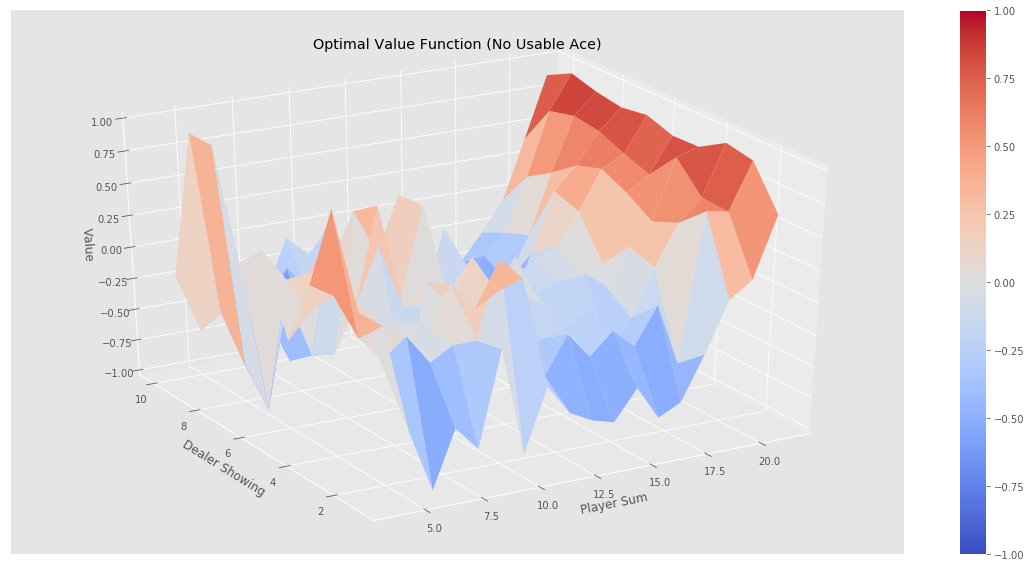

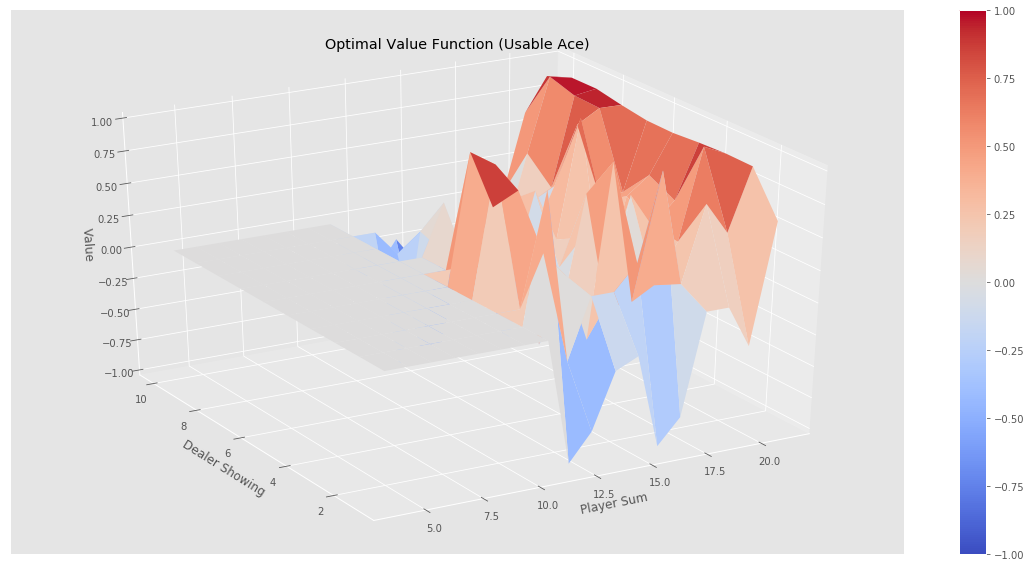

In [19]:
# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")


In [20]:
Q, policy1 = mc_control_epsilon_greedy(env, n_episodes=500000, epsilon=0.1)  #observe the change

In [21]:
#print(policy1)

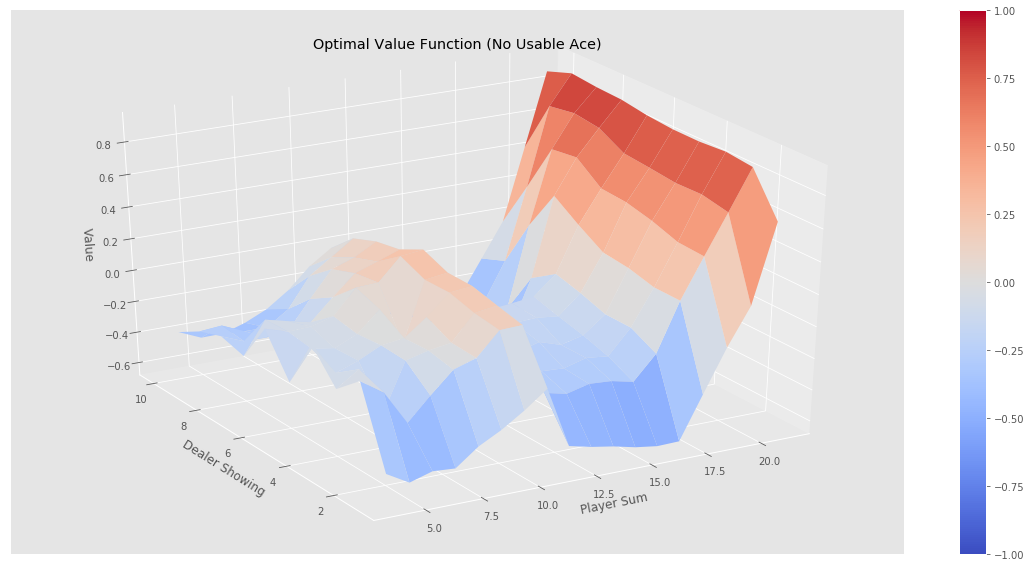

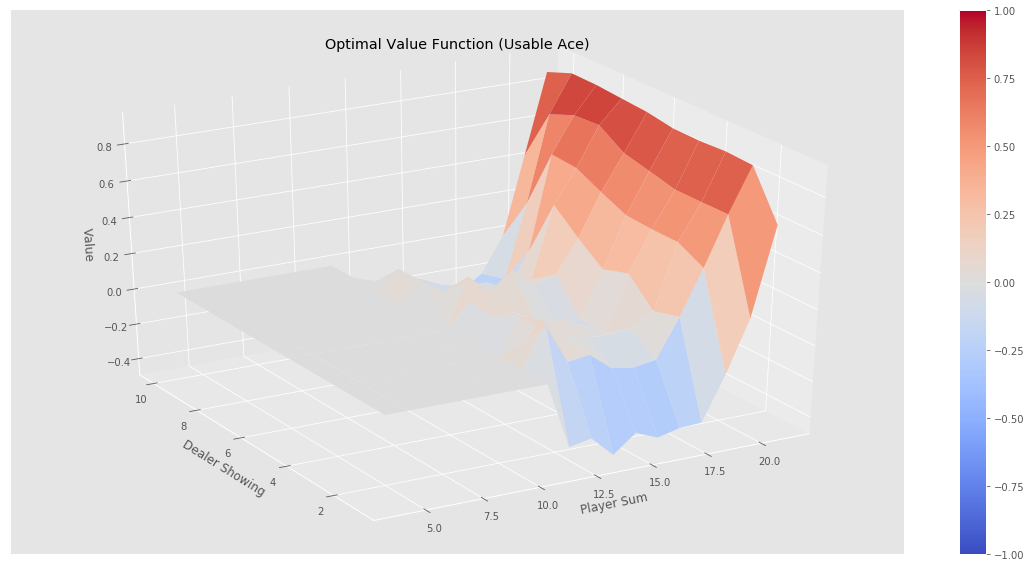

In [22]:
# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")


# Observations to be made by changing variables of the code:

#### 1) epsilon

One mistake that i did in monte carlo was that i summed up the total reward initially during the running of episode and that wasnt creating any problems because this was a game where reward was attained only at the end of the game. But that method was wrong. The updates were done in the code after noticing that error.